DATA PREPROCESSING

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

df_total = pd.DataFrame()

#ENTER YOUR USERNAME 

user = ''

# Define the folder containing the CSV files
data_path_1 = f'/Users/{user}/Downloads/UVAmacro-main/post_1/data/dataset1'
data_path_2 = f'/Users/{user}/Downloads/UVAmacro-main/post_1/data/dataset2'

# folder containing exported figures 
figure_path = f'/Users/{user}/Downloads/UVAmacro-main/post_1/figures'


# dataset 1 


# Load the datasets
df_move_level = pd.read_csv(f'{data_path_1}/move_level.csv')
df_1yr_swap_rate = pd.read_csv(f'{data_path_1}/1yr_swap_rate.csv')
df_2yr_swap_rate = pd.read_csv(f'{data_path_1}/2yr_swap_rate.csv')
df_5yr_swap_rate = pd.read_csv(f'{data_path_1}/5yr_swap_rate.csv')
df_10yr_swap_rate = pd.read_csv(f'{data_path_1}/10yr_swap_rate.csv')
df_10yr_yield = pd.read_csv(f'{data_path_1}/10yr_yield.csv')
df_2yr_yield = pd.read_csv(f'{data_path_1}/2yr_yield.csv')

df_tp = pd.read_csv(f'/Users/{user}/Downloads/UVAmacro-main/post_1/data/dataset1/ACM.csv')
df_BE = pd.read_csv(f'/Users/{user}/Downloads/UVAmacro-main/post_1/data/dataset1/5y5y.csv')



df_move_level['Date'] = pd.to_datetime(df_move_level['Date'])
df_move_level = df_move_level[['Date', 'Price']]
df_move_level = df_move_level.rename(columns={'Price': 'move_level'})


df_1yr_swap_rate['Date'] = pd.to_datetime(df_1yr_swap_rate['Date'])
df_1yr_swap_rate = df_1yr_swap_rate[['Date', 'Price']]
df_1yr_swap_rate = df_1yr_swap_rate.rename(columns={'Price': '1yr_swap_rate'})

df_10yr_swap_rate['Date'] = pd.to_datetime(df_10yr_swap_rate['Date'])
df_10yr_swap_rate = df_10yr_swap_rate[['Date', 'Price']]
df_10yr_swap_rate = df_10yr_swap_rate.rename(columns={'Price': '10yr_swap_rate'})

df_5yr_swap_rate['Date'] = pd.to_datetime(df_10yr_swap_rate['Date'])
df_5yr_swap_rate = df_5yr_swap_rate[['Date', 'Price']]
df_5yr_swap_rate = df_5yr_swap_rate.rename(columns={'Price': '5yr_swap_rate'})

# Process the 2yr swap rate
df_2yr_swap_rate['Date'] = pd.to_datetime(df_2yr_swap_rate['Date'])
df_2yr_swap_rate = df_2yr_swap_rate[['Date', 'Price']]
df_2yr_swap_rate = df_2yr_swap_rate.rename(columns={'Price': '2yr_swap_rate'})

# Process the 10yr yield
df_10yr_yield['Date'] = pd.to_datetime(df_10yr_yield['Date'])
df_10yr_yield = df_10yr_yield[['Date', 'Price']]
df_10yr_yield = df_10yr_yield.rename(columns={'Price': '10yr_yield'})

# Process the 2yr yield
df_2yr_yield['Date'] = pd.to_datetime(df_2yr_yield['Date'])
df_2yr_yield = df_2yr_yield[['Date', 'Price']]
df_2yr_yield = df_2yr_yield.rename(columns={'Price': '2yr_yield'})

# Process the ACM dataset
df_tp['Date'] = pd.to_datetime(df_tp['Date'])
df_tp = df_tp[['Date', 'ACMTP10']]
df_tp = df_tp.rename(columns={'ACMTP10': '10y_tp'})

# Process the 5y5y BE dataset
df_BE['Date'] = pd.to_datetime(df_BE['Date'])
df_BE = df_BE[['Date', 'T5YIFR']]
df_BE = df_BE.rename(columns={'T5YIFR': 'BE'})


df_total = df_1yr_swap_rate \
    .merge(df_2yr_swap_rate, on='Date', how='inner') \
    .merge(df_10yr_yield, on='Date', how='inner') \
    .merge(df_2yr_yield, on='Date', how='inner') \
    .merge(df_tp, on='Date', how='inner') \
    .merge(df_BE, on='Date', how='inner') \
    .merge(df_move_level, on='Date', how='inner')

# creating necessary variables


df_total['1y1y'] = ((1 + df_total['2yr_swap_rate'])**2 / (1 + df_total['1yr_swap_rate'])) - 1



df_total['spread'] = df_total['10yr_yield'] - df_total['2yr_yield']


df_total['move_level'] = df_total['move_level'].rolling(window=7).mean() 


df_total['10y_expectations'] = df_total['10yr_yield'] - df_total['10y_tp']


df_total.sort_values(by='Date', ascending=True, inplace=True)
df_total.reset_index(drop=True, inplace=True)


# creating necessary variables 

# dataset 2

df_move_level = pd.read_csv(f'{data_path_2}/move_level.csv')
df_1yr_swap_rate = pd.read_csv(f'{data_path_2}/1yr_swap_rate.csv')
df_2yr_swap_rate = pd.read_csv(f'{data_path_2}/2yr_swap_rate.csv')
df_4yr_swap_rate = pd.read_csv(f'{data_path_2}/4yr_swap_rate.csv')
df_5yr_swap_rate = pd.read_csv(f'{data_path_2}/5yr_swap_rate.csv')
df_2yr_yield = pd.read_csv(f'{data_path_2}/2yr_yield.csv')
df_10yr_yield = pd.read_csv(f'{data_path_2}/10yr_yield.csv')
df_20yr_yield = pd.read_csv(f'{data_path_2}/20yr_yield.csv')
df_30yr_yield = pd.read_csv(f'{data_path_2}/30yr_yield.csv')
df_10yr_swap_rate = pd.read_csv(f'{data_path_2}/10yr_swap_rate.csv')
df_tp = pd.read_csv(f'{data_path_2}/ACM.csv')
df_2yr_yield = pd.read_csv(f'{data_path_2}/2yr_yield.csv')
df_5yr_yield = pd.read_csv(f'{data_path_2}/5yr_yield.csv')


df_tp['Date'] = pd.to_datetime(df_tp['Date'])
df_tp = df_tp[['Date', 'ACMTP10']]
df_tp = df_tp.rename(columns={'ACMTP10': '10y_tp'})

df_move_level['Date'] = pd.to_datetime(df_move_level['Date'])
df_move_level = df_move_level[['Date', 'Price']]
df_move_level = df_move_level.rename(columns={'Price': 'move_level'})



df_1yr_swap_rate['Date'] = pd.to_datetime(df_1yr_swap_rate['Date'])
df_2yr_swap_rate['Date'] = pd.to_datetime(df_2yr_swap_rate['Date'])
df_4yr_swap_rate['Date'] = pd.to_datetime(df_4yr_swap_rate['Date'])
df_5yr_swap_rate['Date'] = pd.to_datetime(df_5yr_swap_rate['Date'])
df_10yr_yield['Date'] = pd.to_datetime(df_10yr_yield['Date'])
df_10yr_swap_rate['Date'] = pd.to_datetime(df_10yr_swap_rate['Date'])
df_20yr_yield['Date'] = pd.to_datetime(df_20yr_yield['Date'])
df_30yr_yield['Date'] = pd.to_datetime(df_30yr_yield['Date'])
df_2yr_yield['Date'] = pd.to_datetime(df_2yr_yield['Date'])
df_5yr_yield['Date'] = pd.to_datetime(df_5yr_yield['Date'])


df_total_2 = df_move_level
dfs = [
    df_1yr_swap_rate, df_2yr_swap_rate, df_4yr_swap_rate, df_5yr_swap_rate,
    df_10yr_yield, df_10yr_swap_rate, df_20yr_yield, df_30yr_yield, df_tp, df_2yr_yield, df_5yr_yield]

for df in dfs:
    df_total_2 = df_total_2.merge(df, on='Date', how='inner')

df_total_2['butterfly_ust'] = df_total_2['20yr_yield'] - 0.5*(df_total_2['10yr_yield'] + df_total_2['30yr_yield']) 
df_total_2['butterfly_ust'] = df_total_2['butterfly_ust']*100


df_total_2['butterfly_swap'] = df_total_2['5yr_swap_rate'] - (df_total_2['2yr_swap_rate'] + df_total_2['10yr_swap_rate']) / 2
df_total_2['butterfly_swap'] = df_total_2['butterfly_swap']*100



df_total_2['move_level'] = df_total_2['move_level'].rolling(window=7).mean() 

df_total_2['curve'] = df_total_2['10yr_yield'] - df_total_2['2yr_yield']

df_total_2['curve'] = df_total_2['curve']*100

df_total_2['1y1y'] = ((1 + df_total_2['2yr_swap_rate'])**2 / (1 + df_total_2['1yr_swap_rate'])) - 1

df_total_2['4y1y'] = ((1 + df_total_2['5yr_swap_rate'])**5 / (1 + df_total_2['4yr_swap_rate'])**4) - 1

df_total_2 = df_total_2.dropna()

df_total_2.sort_values(by='Date', ascending=True, inplace=True)
df_total_2.reset_index(drop=True, inplace=True)


print(df_total_2.Date)
print(df_total.Date)




df_total_3 = df_2yr_yield
dfs = [
    df_10yr_yield, df_5yr_yield]

for df in dfs:
    df_total_3 = df_total_3.merge(df, on='Date', how='inner')

df_total_3.sort_values(by='Date', ascending=True, inplace=True)
df_total_3.reset_index(drop=True, inplace=True)

0      2006-12-06
1      2006-12-07
2      2006-12-08
3      2006-12-11
4      2006-12-12
          ...    
2422   2016-10-07
2423   2016-10-12
2424   2016-10-14
2425   2016-10-17
2426   2016-10-18
Name: Date, Length: 2427, dtype: datetime64[ns]
0      2018-07-12
1      2018-07-13
2      2018-07-16
3      2018-07-17
4      2018-07-18
          ...    
1592   2024-12-02
1593   2024-12-03
1594   2024-12-04
1595   2024-12-05
1596   2024-12-06
Name: Date, Length: 1597, dtype: datetime64[ns]


FIGURE 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


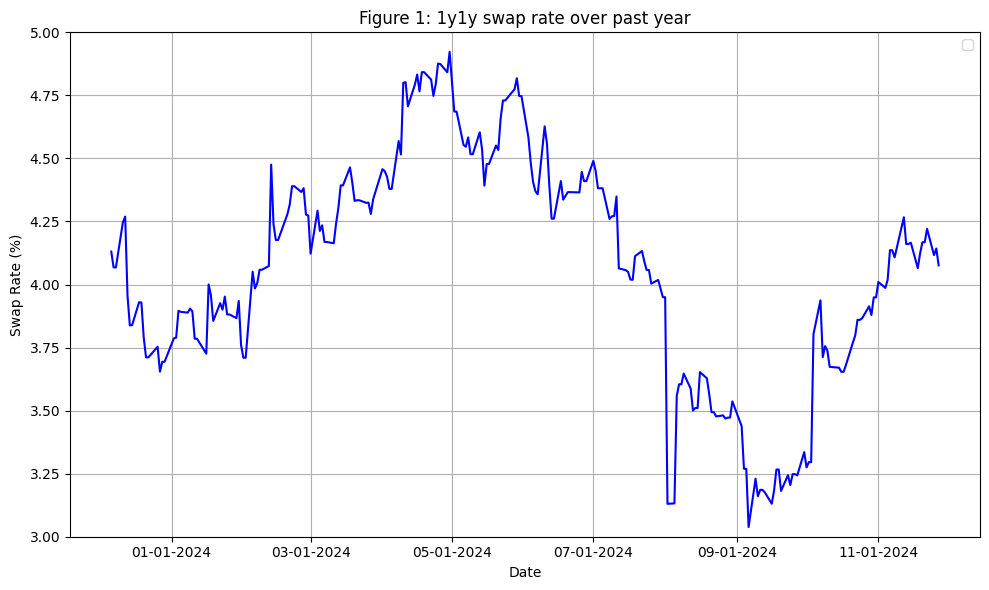

In [19]:



# Plot the data
plt.figure(figsize=(10, 6))

df_restrict = df_total[df_total['Date']>='12-06-2023']
plt.plot(df_restrict['Date'], df_restrict['1y1y'], color='blue')

# Set the title and labels
plt.xlabel('Date')
plt.ylabel('Swap Rate (%)')
plt.title('Figure 1: 1y1y swap rate over past year')
plt.legend()
plt.grid(True)

# Customize y-axis limits (example: set between 0 and 100)
plt.ylim(3, 5)  # Adjust these values as per your dataset range

# Format x-axis to show dates in MM-DD-YYYY format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))


# Save the plot as a JPEG file
plt.tight_layout()

# Save the figure as a JPEG file
plt.savefig(f'{figure_path}/figure1.jpg', format='jpeg')
# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()





FIGURE 2

Linear Regression Results:
------------------------------
Coefficients for each feature:
                            OLS Regression Results                            
Dep. Variable:              spread_bp   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3410.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:46:19   Log-Likelihood:                -7188.8
No. Observations:                1591   AIC:                         1.439e+04
Df Residuals:                    1587   BIC:                         1.441e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

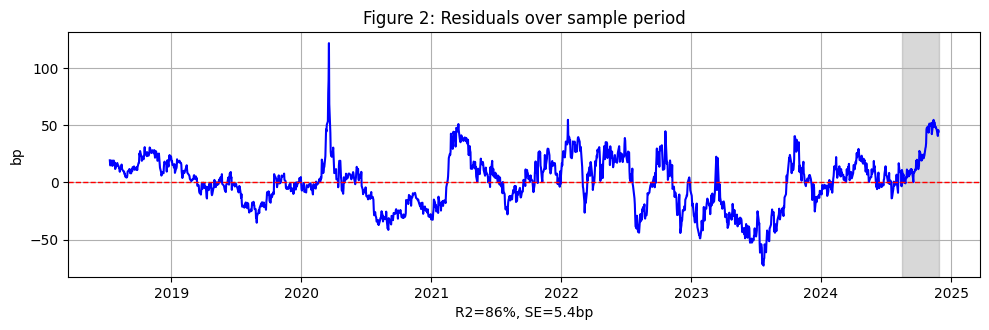

,Date,Actual,Predicted,Residuals
0,2018-07-12,25.9,6.514015,19.385985
1,2018-07-13,24.7,9.785907,14.914093
2,2018-07-16,25.7,9.073941,16.626059
3,2018-07-17,24.5,6.710033,17.789967
4,2018-07-18,26.0,6.760631,19.239369
...,...,...,...,...
1586,2024-11-21,7.2,-39.480497,46.680497
1587,2024-11-22,3.1,-42.658194,45.758194
1588,2024-11-25,0.3,-40.367273,40.667273
1589,2024-11-26,4.7,-41.183610,45.883610


In [4]:
df_total.dropna(inplace=True)

def perform_regression(title, data, independent_vars, dependent_var, plot_type='line'):
    """
    Performs linear regression and plots residuals over the sample period.
    
    Parameters:
    - independent_vars (list): List of column names to be used as independent variables.
    - dependent_var (str): Name of the column to be used as the dependent variable.
    - start_date (str or pd.Timestamp): The date to start the analysis from (e.g., '2024-09-01').
    - plot_type (str): Type of plot ('line') for residuals. Scatter plot option has been removed.
    
    Outputs the regression coefficients, intercept, R-squared value, standard errors, and a residuals plot.
    Returns a DataFrame containing the residuals.
    """
    df = data
    # Independent and dependent variables for regression
    X = df[independent_vars]
    y = df[dependent_var]

   
    # Add a constant to the model for the intercept term (required by statsmodels)
    X = sm.add_constant(X)
    
    # Fit the regression model using statsmodels
    model = sm.OLS(y, X).fit()

    # Regression results
    print("Linear Regression Results:")
    print("-" * 30)
    print("Coefficients for each feature:")
    print(model.summary())

    residual_se = model.bse[0]  # You can access the standard error of the model this way
    print("Standard Error of the Model:", residual_se)
    
    # Get predicted values
    y_pred = model.predict(X)

    # Calculate residuals
    residuals = y - y_pred

    # Create a DataFrame containing residuals, actual values, and predicted values
    residuals_df = pd.DataFrame({
        'Date': df['Date'],
        'Actual': y,
        'Predicted': y_pred,
        'Residuals': residuals
    })


    # Convert the 'Date' column to datetime format if it is not already in datetime format
    residuals_df['Date'] = pd.to_datetime(residuals_df['Date'])

    # Filter the DataFrame based on the specified date range
    date_range_filtered = residuals_df[(residuals_df['Date'] >= '2024-08-15') & (residuals_df['Date'] <= '2024-11-27')]

    # Compute the average of the 'Residuals' in the filtered date range
    average_residuals = date_range_filtered['Residuals'].mean()

    # Print the result
    print(f"Average of Residuals between '2024-08-15' and '2024-11-27': {average_residuals:.2f} bp")

    # Plotting the residuals
    plt.figure(figsize=(10, 6))

    # Plot residuals over time (line plot only)
    plt.subplot(2, 1, 1)
    plt.plot(df['Date'], residuals, label='Residuals', color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a red dashed line at 0

    # Add light grey hue starting from start_date
    plt.axvspan('2024-08-15', '2024-11-27', color='grey', alpha=0.3)

    plt.xlabel('R2=86%, SE=5.4bp')
    plt.ylabel('bp')
    plt.title('Figure 2: Residuals over sample period')
    plt.grid(True)


    plt.savefig(f'{figure_path}/figure2.jpg', format='jpeg', bbox_inches='tight')

    # Display the plots
    plt.tight_layout()
    plt.show()

    # Return the residuals DataFrame
    return residuals_df





steepening_start = '2024-08-15'

df_total['spread_bp'] = df_total['spread']*100
perform_regression('main_regression_residuals', df_total, ['1y1y', 'BE', 'move_level'], 'spread_bp')



FIGURE 3

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3410.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:46:19   Log-Likelihood:                 138.03
No. Observations:                1591   AIC:                            -268.1
Df Residuals:                    1587   BIC:                            -246.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0168      0.055    -18.645      0.0

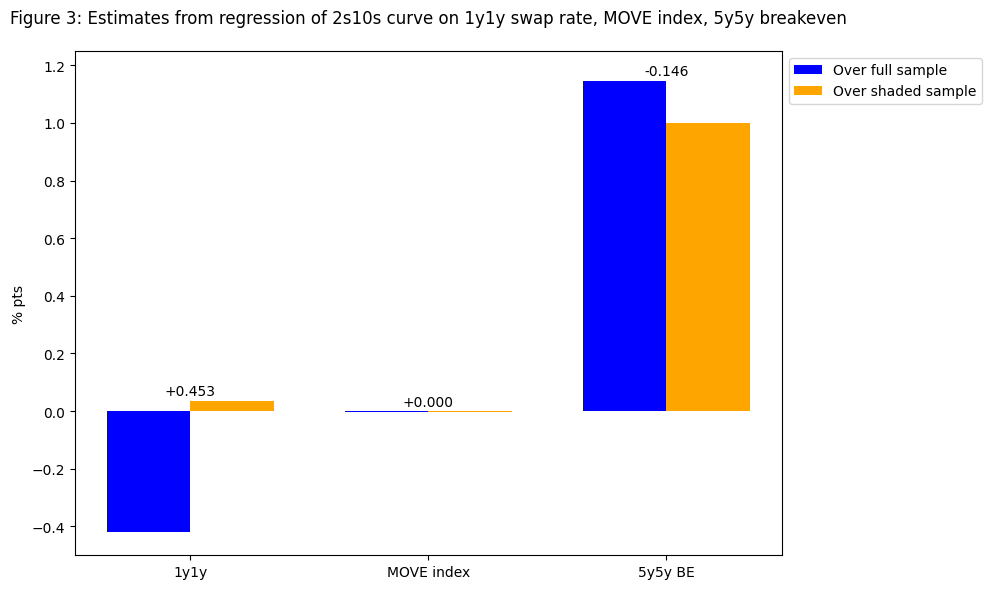

In [5]:


# Full sample regression
X_full = df_total[['1y1y', 'move_level', 'BE']]  # Independent variables
y_full = df_total['spread']  # Dependent variable
X_full = sm.add_constant(X_full)  # Add constant (intercept)
model_full = sm.OLS(y_full, X_full).fit()  # OLS regression
coef_full = model_full.params[['1y1y', 'move_level', 'BE']]  # Coefficients for the full sample
print(model_full.summary())

# Restricted sample regression (Date >= '2024-08-15')
df_restricted = df_total[df_total['Date'] >= steepening_start]
X_restricted = df_restricted[['1y1y', 'move_level', 'BE']]  # Independent variables
y_restricted = df_restricted['spread']  # Dependent variable
X_restricted = sm.add_constant(X_restricted)  # Add constant (intercept)
model_restricted = sm.OLS(y_restricted, X_restricted).fit()  # OLS regression
coef_restricted = model_restricted.params[['1y1y', 'move_level', 'BE']]  # Coefficients for the restricted sample
print(model_restricted.summary())

# Data for bar plot
coefficients = [coef_full, coef_restricted]
labels = ['Full Sample', 'Restricted Sample (Date >= 2024-08-26)']
colors = ['blue', 'orange']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set positions for the bars
bar_width = 0.35  # Adjust width of bars
index = ['1y1y', 'MOVE index', '5y5y BE']
x_pos = [i - bar_width / 2 for i in range(len(index))]  # Positions for full sample bars
x_pos_restricted = [i + bar_width / 2 for i in range(len(index))]  # Positions for restricted sample bars

# Plot bars for each coefficient
bars_full = ax.bar(x_pos, coef_full, bar_width, color='blue', label='Over full sample')
bars_restricted = ax.bar(x_pos_restricted, coef_restricted, bar_width, color='orange', label='Over shaded sample')

# Add the numeric differences at the midpoint of the two bars in each pair
for i in range(len(index)):
    # Calculate the difference between full sample and restricted sample for each variable
    diff = coef_restricted.iloc[i] - coef_full.iloc[i]
    
    # Midpoint between the two bars
    midpoint = (x_pos[i] + x_pos_restricted[i]) / 2
    
    # Add the text (difference) at the midpoint above the bars

    if diff > 0:
       ax.text(midpoint, max(coef_full.iloc[i], coef_restricted.iloc[i]) + 0.01, f'+{diff:.3f}', ha='center', va='bottom', fontsize=10, color='black') 
    
    else:
        ax.text(midpoint, max(coef_full.iloc[i], coef_restricted.iloc[i]) + 0.01, f'{diff:.3f}', ha='center', va='bottom', fontsize=10, color='black')

# Customizing the graph
ax.set_title('Figure 3: Estimates from regression of 2s10s curve on 1y1y swap rate, MOVE index, 5y5y breakeven', pad=20)
ax.set_ylabel('% pts')
ax.set_xticks(range(len(index)))  # Set x-ticks in the center of the pairs of bars
ax.set_xticklabels(index)  # Label each pair (1y1y, move_level, BE)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(f'{figure_path}/figure3.jpg', format='jpeg', bbox_inches='tight')

# Set y-axis limits (adjust based on data range)
ax.set_ylim([-0.5, 1.25])  # Adjust this as needed based on the range of your coefficients

# Adjust layout to avoid clipping
plt.tight_layout()


# Display the plot
plt.show()

FIGURE 4

                            OLS Regression Results                            
Dep. Variable:              2yr_yield   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.720e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:46:20   Log-Likelihood:                -359.12
No. Observations:                1591   AIC:                             726.2
Df Residuals:                    1587   BIC:                             747.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8888      0.075     11.924      0.0

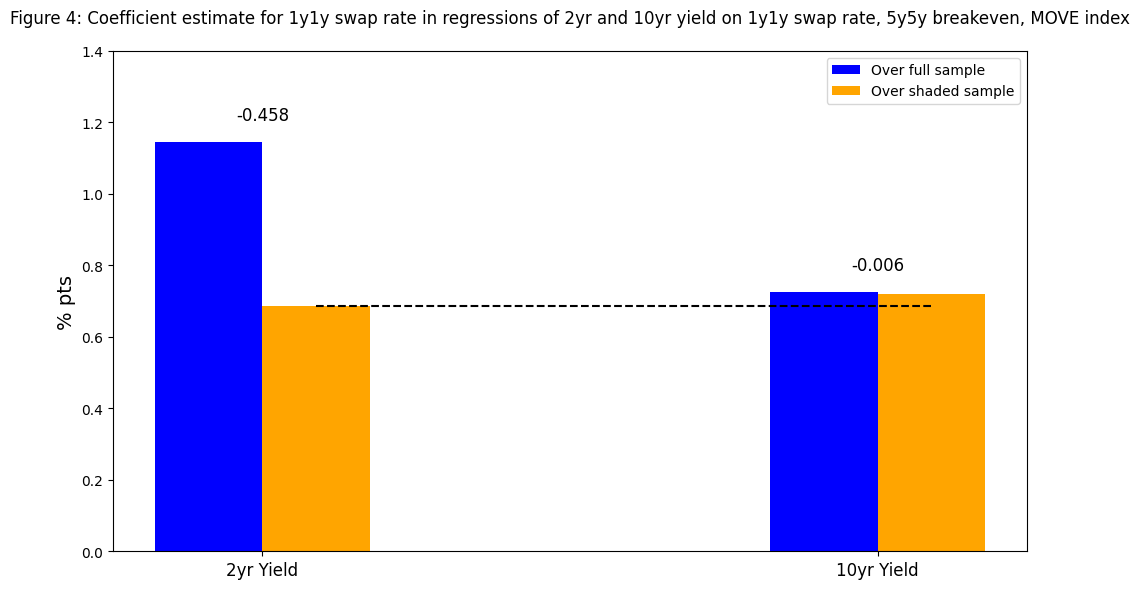

In [6]:

# Assuming df_total is already defined

# Full sample regression for 2yr_yield
X_full = df_total[['BE', 'move_level', '1y1y']]  # Independent variables
y_full_2yr = df_total['2yr_yield']  # Dependent variable
X_full = sm.add_constant(X_full)  # Add constant (intercept)
model_full_2yr = sm.OLS(y_full_2yr, X_full).fit()  # OLS regression
coef_full_2yr = model_full_2yr.params['1y1y']  # Coefficient for 1y1y in full sample
print(model_full_2yr.summary())

# Restricted sample regression for 2yr_yield (Date >= '2024-08-15')
df_restricted = df_total[df_total['Date'] >= '2024-08-15']
X_restricted = df_restricted[['BE', 'move_level', '1y1y']]  # Independent variables
y_restricted_2yr = df_restricted['2yr_yield']  # Dependent variable
X_restricted = sm.add_constant(X_restricted)  # Add constant (intercept)
model_restricted_2yr = sm.OLS(y_restricted_2yr, X_restricted).fit()  # OLS regression
coef_restricted_2yr = model_restricted_2yr.params['1y1y']  # Coefficient for 1y1y in restricted sample
print(model_restricted_2yr.summary())

# Full sample regression for 10yr_yield
X_full_10yr = df_total[['BE', 'move_level', '1y1y']]  # Independent variables
y_full_10yr = df_total['10yr_yield']  # Dependent variable
X_full_10yr = sm.add_constant(X_full_10yr)  # Add constant (intercept)
model_full_10yr = sm.OLS(y_full_10yr, X_full_10yr).fit()  # OLS regression
coef_full_10yr = model_full_10yr.params['1y1y']  # Coefficient for 1y1y in full sample
print(model_full_10yr.summary())

# Restricted sample regression for 10yr_yield (Date >= '2024-08-15')
df_restricted_10yr = df_restricted[['BE', 'move_level', '1y1y', '10yr_yield']]
y_restricted_10yr = df_restricted_10yr['10yr_yield']  # Dependent variable
X_restricted_10yr = sm.add_constant(df_restricted_10yr[['BE', 'move_level', '1y1y']])  # Add constant (intercept)
model_restricted_10yr = sm.OLS(y_restricted_10yr, X_restricted_10yr).fit()  # OLS regression
coef_restricted_10yr = model_restricted_10yr.params['1y1y']  # Coefficient for 1y1y in restricted sample
print(model_restricted_10yr.summary())

# Data for plotting
coefficients_2yr = [coef_full_2yr, coef_restricted_2yr]
coefficients_10yr = [coef_full_10yr, coef_restricted_10yr]
labels = ['Full Sample', 'Restricted Sample (Date >= 2024-08-15)']

# Set up the bar width and positions
bar_width = 0.35
index_2yr = [0, bar_width]  # Positions for 2yr_yield bars (touching)
index_10yr = [2, 2 + bar_width]  # Positions for 10yr_yield bars (gap between 2yr and 10yr)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for 2yr_yield and 10yr_yield regressions
bar_2yr_full = ax.bar(index_2yr[0], coef_full_2yr, bar_width, label='Over full sample', color='blue')
bar_2yr_restricted = ax.bar(index_2yr[1], coef_restricted_2yr, bar_width, label='Over shaded sample', color='orange')

bar_10yr_full = ax.bar(index_10yr[0], coef_full_10yr, bar_width, color='blue')
bar_10yr_restricted = ax.bar(index_10yr[1], coef_restricted_10yr, bar_width, color='orange')

# Add the numeric differences on top of the midpoint of the bars
diff_2yr = coef_restricted_2yr - coef_full_2yr
diff_10yr = coef_restricted_10yr - coef_full_10yr

# Midpoint of bars for the difference text
midpoint_2yr = (index_2yr[0] + index_2yr[1]) / 2
midpoint_10yr = (index_10yr[0] + index_10yr[1]) / 2

ax.text_2yr = (index_2yr[0])

# Add the difference text
if diff_2yr>0:
    ax.text(midpoint_2yr, max(coef_full_2yr, coef_restricted_2yr) + 0.05, f'+{diff_2yr:.3f}', ha='center', va='bottom', fontsize=12, color='black')
if diff_2yr<0:
    ax.text(midpoint_2yr, max(coef_full_2yr, coef_restricted_2yr) + 0.05, f'{diff_2yr:.3f}', ha='center', va='bottom', fontsize=12, color='black')
if diff_10yr>0:
    ax.text(midpoint_2yr, max(coef_full_2yr, coef_restricted_2yr) + 0.05, f'+{diff_10yr:.3f}', ha='center', va='bottom', fontsize=12, color='black')
if diff_10yr<0:
    ax.text(midpoint_10yr, max(coef_full_10yr, coef_restricted_10yr) + 0.05, f'{diff_10yr:.3f}', ha='center', va='bottom', fontsize=12, color='black')

# Customizing the graph
ax.set_title('Figure 4: Coefficient estimate for 1y1y swap rate in regressions of 2yr and 10yr yield on 1y1y swap rate, 5y5y breakeven, MOVE index', fontsize=12, pad='20')
ax.set_ylabel('% pts', fontsize=14)

# Set the x-axis positions and labels
ax.set_xticks([np.mean(index_2yr), np.mean(index_10yr)])  # Position x-ticks in the middle of each pair
ax.set_xticklabels(['2yr Yield', '10yr Yield'], fontsize=12)

# Set y-axis limits (customize as needed)
ax.set_ylim([0, 1.4])  # Adjust the y-axis limits based on your data

# Find the top positions of the orange bars for the restricted sample
top_2yr_restricted = coef_restricted_2yr  # Height of the leftmost orange bar
top_10yr_restricted = coef_restricted_10yr  # Height of the rightmost orange bar

# Add a horizontal line connecting the tops of the restricted sample bars
ax.hlines(y=top_2yr_restricted, xmin=index_2yr[1], xmax=index_10yr[1], 
          colors='black', linestyles='dashed', linewidth=1.5)
# Add a legend
ax.legend()
plt.savefig(f'{figure_path}/figure4.jpg', format='jpeg', bbox_inches='tight')

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

FIGURE 5 


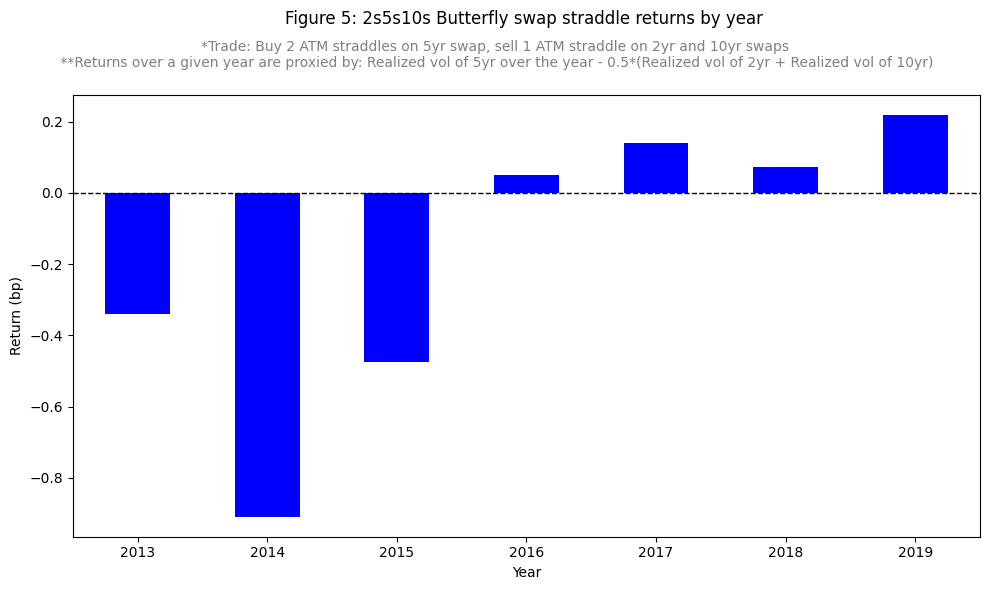

In [20]:
# Assuming df_total_2 is already loaded and 'Date' column is in datetime format




df_total_3['2yr_swap_pct_returns'] = df_total_3['2yr_yield'].pct_change()
df_total_3['5yr_swap_pct_returns'] = df_total_3['5yr_yield'].pct_change()
df_total_3['10yr_swap_pct_returns'] = df_total_3['10yr_yield'].pct_change()

# Calculate the standard deviation of log returns (realized volatility) over the past 252 days
df_total_3['2yr_swap_vol'] = df_total_3['2yr_swap_pct_returns'].rolling(window=252).std()  # No annualization
df_total_3['5yr_swap_vol'] = df_total_3['5yr_swap_pct_returns'].rolling(window=252).std()  # No annualization
df_total_3['10yr_swap_vol'] = df_total_3['10yr_swap_pct_returns'].rolling(window=252).std()  # No annualization

# Calculate the 'quantity' based on the formula
df_total_3['quantity'] = (df_total_3['5yr_swap_vol'] - 0.5 * (df_total_3['2yr_swap_vol'] + df_total_3['10yr_swap_vol'])) * 100

# Extract the year from the 'Date' column for grouping
df_total_3['Year'] = df_total_3['Date'].dt.year

# Group by the 'Year' and calculate the last value of 'quantity' for each year
annual_quantity = df_total_3.groupby('Year')['quantity'].last()

# Filter for specific years
annual_quantity = annual_quantity[annual_quantity.index.isin([2013, 2014, 2015, 2016, 2017, 2018, 2019])]  # Filter for years 2014-2019

# Plotting
plt.figure(figsize=(10, 6))
annual_quantity.plot(kind='bar', color='blue')
plt.title('Figure 5: 2s5s10s Butterfly swap straddle returns by year \n\n\n')
plt.xlabel('Year')
plt.ylabel('Return (bp)')

plt.figtext(0.5, 0.88, '*Trade: Buy 2 ATM straddles on 5yr swap, sell 1 ATM straddle on 2yr and 10yr swaps\n **Returns over a given year are proxied by: Realized vol of 5yr over the year - 0.5*(Realized vol of 2yr + Realized vol of 10yr)', ha='center', fontsize=10, color='gray')

plt.xticks(rotation=0)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig(f'{figure_path}/figure5.jpg', format='jpeg', bbox_inches='tight')
plt.show()



FIGURE 6

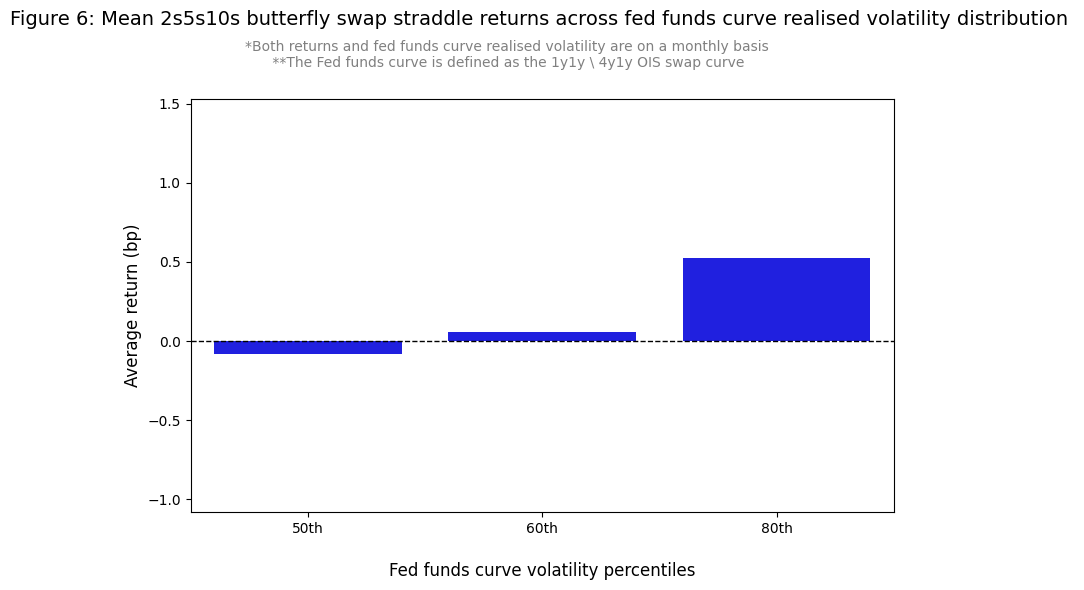

In [18]:







import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total_2 is already loaded and 'Date' column is in datetime format

df_total_2['2yr_swap_pct_returns'] = df_total_2['2yr_swap_rate'].pct_change()
df_total_2['5yr_swap_pct_returns'] = df_total_2['5yr_swap_rate'].pct_change()
df_total_2['10yr_swap_pct_returns'] = df_total_2['10yr_swap_rate'].pct_change()

# Calculate curve as difference between 4y1y and 1y1y
df_total_2['curve'] = df_total_2['4y1y'] - df_total_2['1y1y']

# Calculate the rolling 30-day realized volatility of the 'curve' variable
df_total_2['curve_pct_change'] = df_total_2['curve'].pct_change()

# Calculate the 30-day rolling standard deviation (realized volatility) and annualize it
df_total_2['curve_vol_30d'] = df_total_2['curve_pct_change'].rolling(window=30).std() * np.sqrt(12)

# Calculate the 'quantity' based on the formula using the 30-day volatility of 2yr, 5yr, and 10yr yields
df_total_2['2yr_swap_vol_30d'] = df_total_2['2yr_swap_pct_returns'].rolling(window=30).std() * np.sqrt(12)
df_total_2['5yr_swap_vol_30d'] = df_total_2['5yr_swap_pct_returns'].rolling(window=30).std() * np.sqrt(12)
df_total_2['10yr_swap_vol_30d'] = df_total_2['10yr_swap_pct_returns'].rolling(window=30).std() * np.sqrt(12)

df_total_2['quantity_30d'] = (df_total_2['5yr_swap_vol_30d'] - 0.5 * (df_total_2['2yr_swap_vol_30d'] + df_total_2['10yr_swap_vol_30d'])) * 100

# Compute percentiles for different categories
vol_50 = df_total_2['curve_vol_30d'].quantile(0.50)
vol_80 = df_total_2['curve_vol_30d'].quantile(0.80)
vol_60 = df_total_2['curve_vol_30d'].quantile(0.60)

# Categorize into Bottom 20%, Middle 50%, and Top 30%
def categorize_vol(value):
    if value < vol_50:
        return '50th'  # Below the 20th percentile
    elif value > vol_80:
        return '80th'  # Above the 80th percentile
    elif value > vol_60:
        return '60th'  # Between the 70th and 80th percentiles
    else:
        return 'Middle 50%'  # Between the 20th and 70th percentiles

df_total_2['vol_category'] = df_total_2['curve_vol_30d'].apply(categorize_vol)

# Compute average of 'quantity_30d' for each category
avg_quantity = df_total_2.groupby('vol_category')['quantity_30d'].mean()

# Filter only 'Bottom 20%', 'Middle 50%', and 'Top 30%' categories
avg_quantity_filtered = avg_quantity[['50th', '60th', '80th']]

# Set custom y-axis range (Modify as needed)
y_min = avg_quantity_filtered.min() - 1  # Adjust margin below min
y_max = avg_quantity_filtered.max() + 1  # Adjust margin above max

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_quantity_filtered.index, y=avg_quantity_filtered.values, palette=['blue', 'blue', 'blue'])

# Add labels and title
plt.title('Figure 6: Mean 2s5s10s butterfly swap straddle returns across fed funds curve realised volatility distribution \n\n\n', fontsize=14)
plt.figtext(0.5, 0.88, '*Both returns and fed funds curve realised volatility are on a monthly basis \n **The Fed funds curve is defined as the 1y1y \ 4y1y OIS swap curve ', ha='center', fontsize=10, color='gray')

plt.xlabel('\nFed funds curve volatility percentiles', fontsize=12)
plt.ylabel('Average return (bp)', fontsize=12)
plt.xticks(rotation=0)

# Add horizontal dotted line at zero
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Set custom y-axis limits
plt.ylim(y_min, y_max)

# Save and show plot
plt.tight_layout()
plt.savefig(f'{figure_path}/figure6.jpg', format='jpeg', bbox_inches='tight')
plt.show()




